In [1]:
import numpy as np
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)

In [14]:
print(x.shape)
print(X.shape)

print(y.shape)
print(Y.shape)


(240,)
(180, 240)
(180,)
(180, 240)


In [23]:
print(Z.shape)
print(Z[0][0])

(180, 240)
0.02122529028371209


---

In [86]:
import numpy as np
import rasterio
from rasterio import Affine as A
from rasterio.warp import reproject, Resampling

# with rasterio.Env():

# As source: a 512 x 512 raster centered on 0 degrees E and 0
# degrees N, each pixel covering 15".
rows, cols = src_shape = (512, 512)
#d = 1.0/240 # decimal degrees per pixel  #Original d, i changed to make the raster cover the same area as the web mercator below
d = 1.0/122 # decimal degrees per pixel
# The following is equivalent to
# A(d, 0, -cols*d/2, 0, -d, rows*d/2).
src_transform = A.translation(-cols*d/2, rows*d/2) * A.scale(d, -d)
src_crs = {'init': 'EPSG:4326'}
source = np.ones(src_shape, np.uint8)*255

In [65]:
source

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [66]:
src_transform

Affine(0.0078125, 0.0, -2.0,
       0.0, -0.0078125, 2.0)

In [56]:
# Destination: a 1024 x 1024 dataset in Web Mercator (EPSG:3857)
# with origin at 0.0, 0.0.
dst_shape = (1024, 1024)
# Affine GDAL Style in example is c,a,b,f,d,e   (https://rasterio.readthedocs.io/en/latest/topics/reproject.html)
# dst_transform = [-237481.5, 425.0, 0.0, 237536.4, 0.0, -425.0]
# Recreate in correct abcdef format:
dst_transform = [425.0, 0.0,-237481.5, 0.0, -425.0, 237536.4, ]
dst_crs = {'init': 'EPSG:3857'}
destination = np.zeros(dst_shape, np.uint8)

In [57]:
destination

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
dst_transform

[425.0, 0.0, -237481.5, 0.0, -425.0, 237536.4]

In [87]:
reproject(
    source,
    destination,
    src_transform=src_transform,
    src_crs=src_crs,
    dst_transform=dst_transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest)

(array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8),
 [425.0, 0.0, -237481.5, 0.0, -425.0, 237536.4])

In [60]:
np.count_nonzero(source)

262144

In [88]:
np.count_nonzero(destination)

1030225

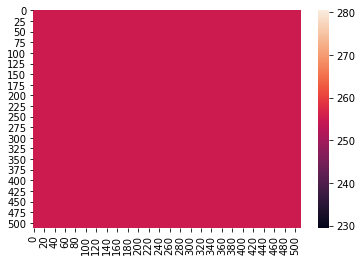

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(source)

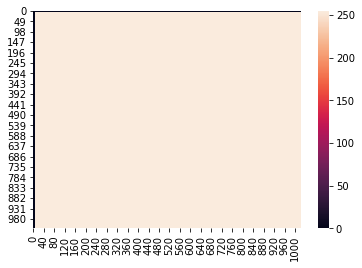

In [89]:
sns.heatmap(destination)